In [55]:
#  dependencies and set up
from configparser import ConfigParser
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import pymysql

In [50]:
paser = ConfigParser()
_ = paser.read('notebook.cfg')
passward = paser.get('my_api','auth_key')

In [70]:
# establish connection string
db_name = "sql_challenge"
db_host = "localhost"
db_username = "root"
db_password = passward
conn = pymysql.connect(host = db_host,
                           port = int(3306),
                           user = "root",
                           password = db_password,
                           db = db_name)

In [71]:
# set command to a variable
cmd = 'select * from salaries'

In [75]:
# read table
df = pd.read_sql_query(cmd, conn)

/var/folders/dx/2wntp99j4bg0mb5ngrz37wwr0000gn/T/ipykernel_41530/1504878795.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(cmd, conn)


In [73]:
df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


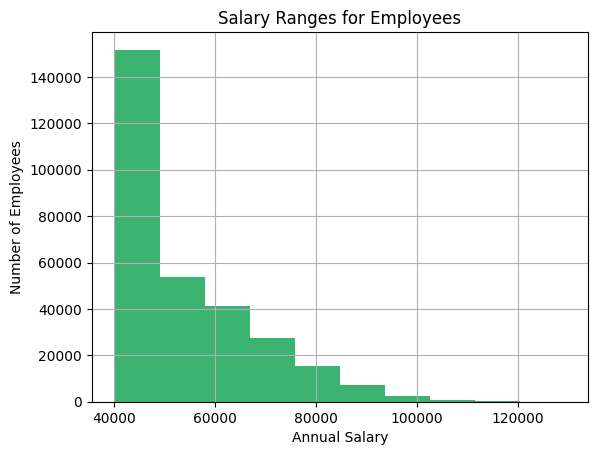

In [86]:
# histogram of most common salary ranges for employees
df['salary'].hist(color="mediumseagreen")
plt.title("Salary Ranges for Employees")
plt.xlabel("Annual Salary")
plt.ylabel("Number of Employees")
plt.savefig("images/histogram_salaries.png")
plt.show()

In [87]:
# set command to variable
cmd_title_salary = f"SELECT * FROM avg_salaries_by_title ORDER BY avg_salary ASC"

In [88]:
salary_df = pd.read_sql_query(cmd_title_salary,conn)

/var/folders/dx/2wntp99j4bg0mb5ngrz37wwr0000gn/T/ipykernel_41530/1314714955.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_df = pd.read_sql_query(cmd_title_salary,conn)


In [89]:
salary_df.head()

,Avg_salary,Employees Title
0,48506.80,Senior Engineer\r
1,48535.34,Engineer\r
2,48564.43,Assistant Engineer\r
3,48582.90,Technique Leader\r
4,51531.04,Manager


) missing from current font.mb5ngrz37wwr0000gn/T/ipykernel_41530/2195023457.py:10: UserWarning: Glyph 13 (
  plt.savefig("images/avg_salary_titles.png")
) missing from current font.ence/DS&ML/Analytics_projects/.env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


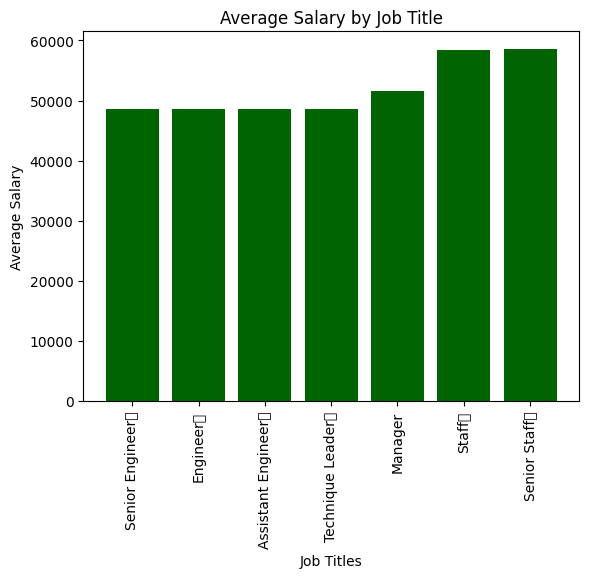

In [92]:
# create variables for plotting
title = salary_df['Employees Title']
salary = salary_df['Avg_salary']
# create bar plot
plt.bar(title,salary,color="darkgreen")
plt.title("Average Salary by Job Title")
plt.xlabel("Job Titles")
plt.ylabel("Average Salary")
plt.xticks(rotation=90)
plt.savefig("images/avg_salary_titles.png")
plt.show()